In [204]:
# Preprocessed the dataset (removing NaN values, adding features and splitting the catogerical value column to binary columns) 
# scale, split, train dataset
# Test on linear , random forest finding best estimator

In [205]:
# Import Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
#load data
data = pd.read_csv("housing.csv", sep=",")

In [207]:
# Quick snapshot of the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [208]:
# Display a concise summary of the DataFrame, including column names, non-null values, and data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [209]:
# Drops rows that have at least one NaN value
data.dropna(inplace= True)

In [210]:
# Check if Null data removal
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [211]:
# Split data into training & testing. Split into x and y data. Train model then evalute the data.

In [212]:
# import the train_test_split function from the scikit-learn library, used to split a dataset into training and testing subsets.
from sklearn.model_selection import train_test_split

# Separate the features(indpendent variable) and the target(dependent variable) .
# 'x' contains all columns except 'median_house_value', which serves as the features.
# 'y' contains only the 'median_house_value' column, which serves as the target variable.
x = data.drop(['median_house_value'], axis =1)
y = data ['median_house_value']

In [213]:
# Split the data into training and testing sets.
# 20% of the data is reserved for testing (validation), while 80% is used for training the model.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

In [214]:
# combine training dataset
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

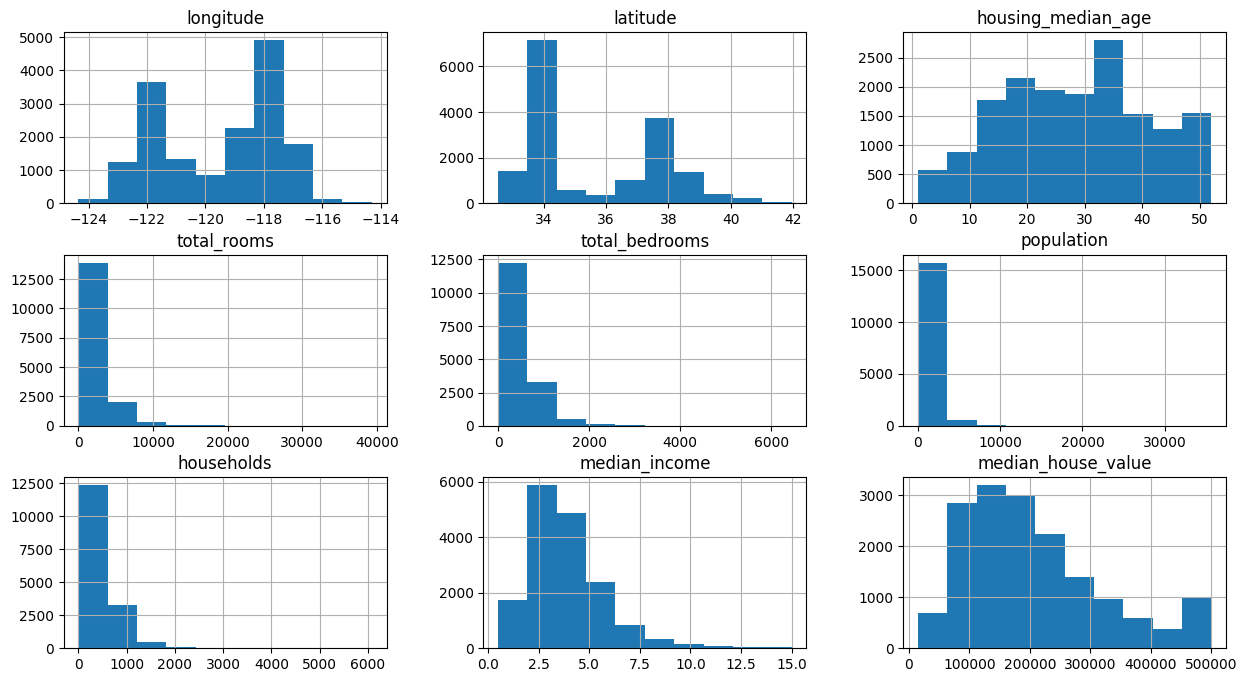

In [215]:
# Data exploration of train dataset
train_data.hist(figsize=(15,8))

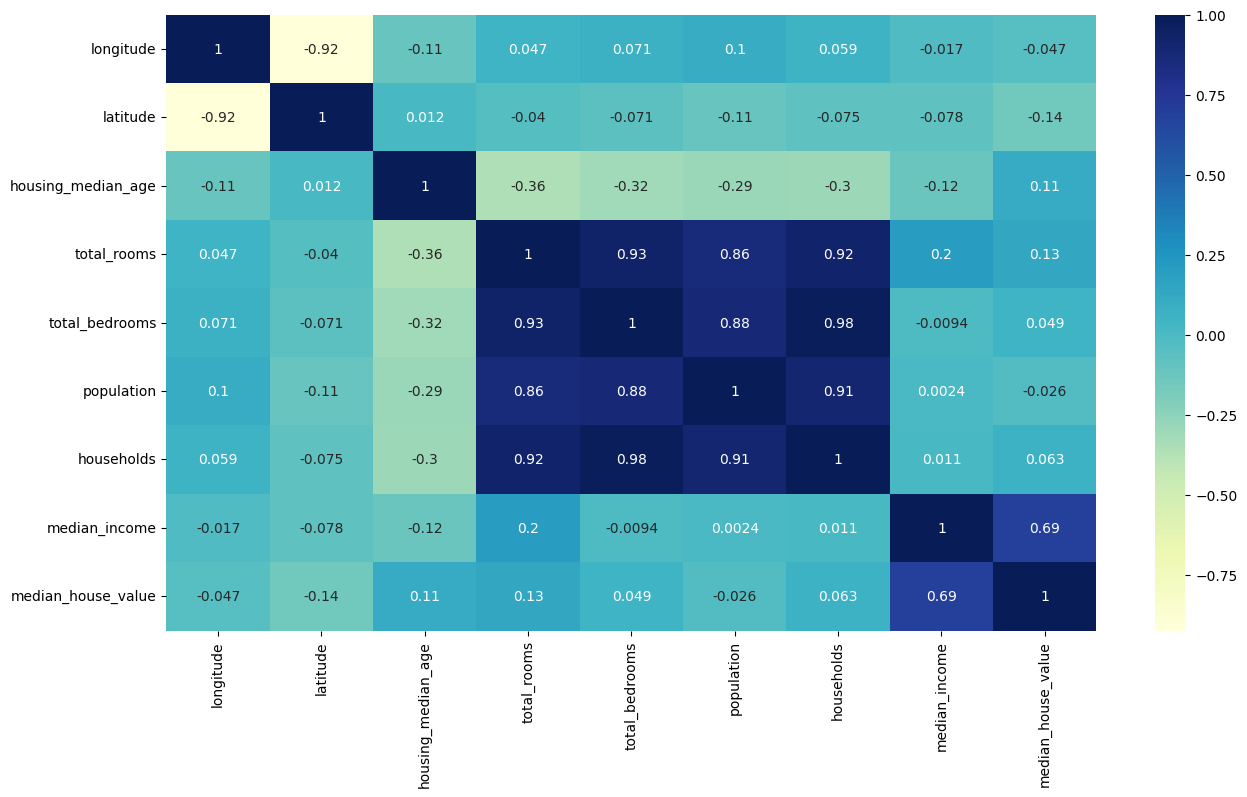

In [216]:
# Correlation for numeric columns only
correlation_matrix = train_data.select_dtypes(include=["number"]).corr()

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

# Display the plot
plt.show()

In [217]:
# Data pre-processing: Take the logarithm of right skewed variables
train_data['total_rooms']= np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms']+1)
train_data['population']= np.log(train_data['population']+1)
train_data['households']= np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

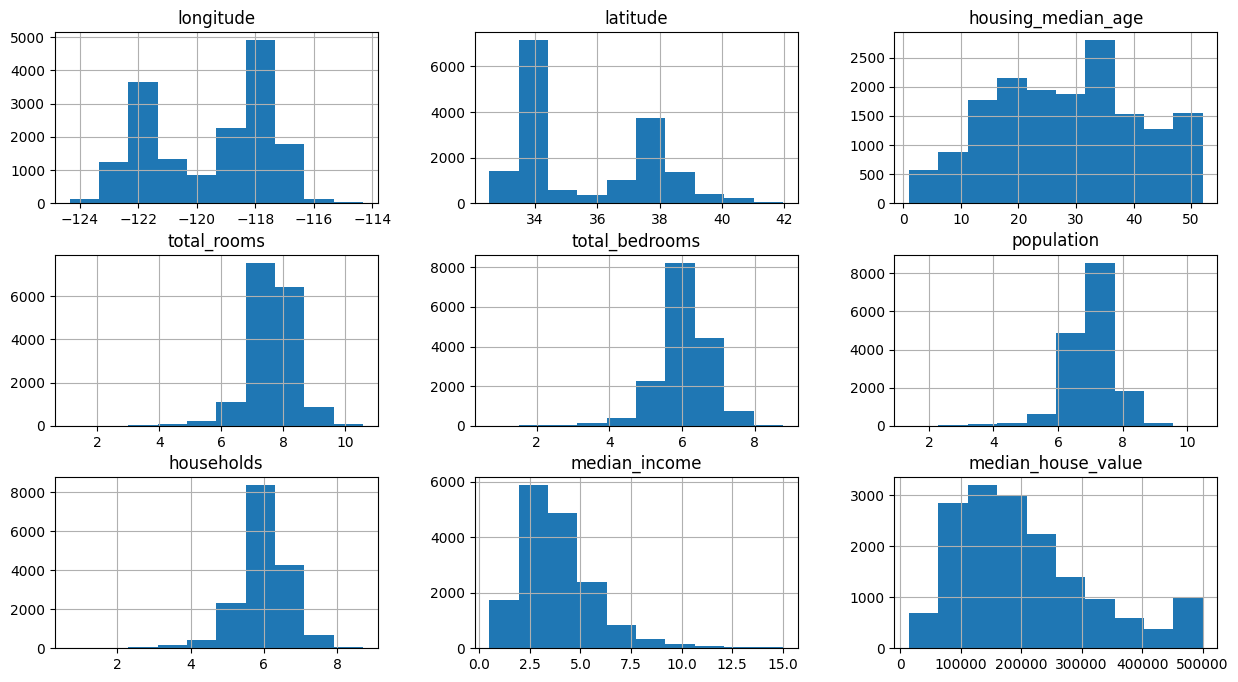

In [218]:
# Check normalized data
train_data.hist(figsize=(15,8))

In [219]:
# Get dummy variables for ocean proximity
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'],axis=1)

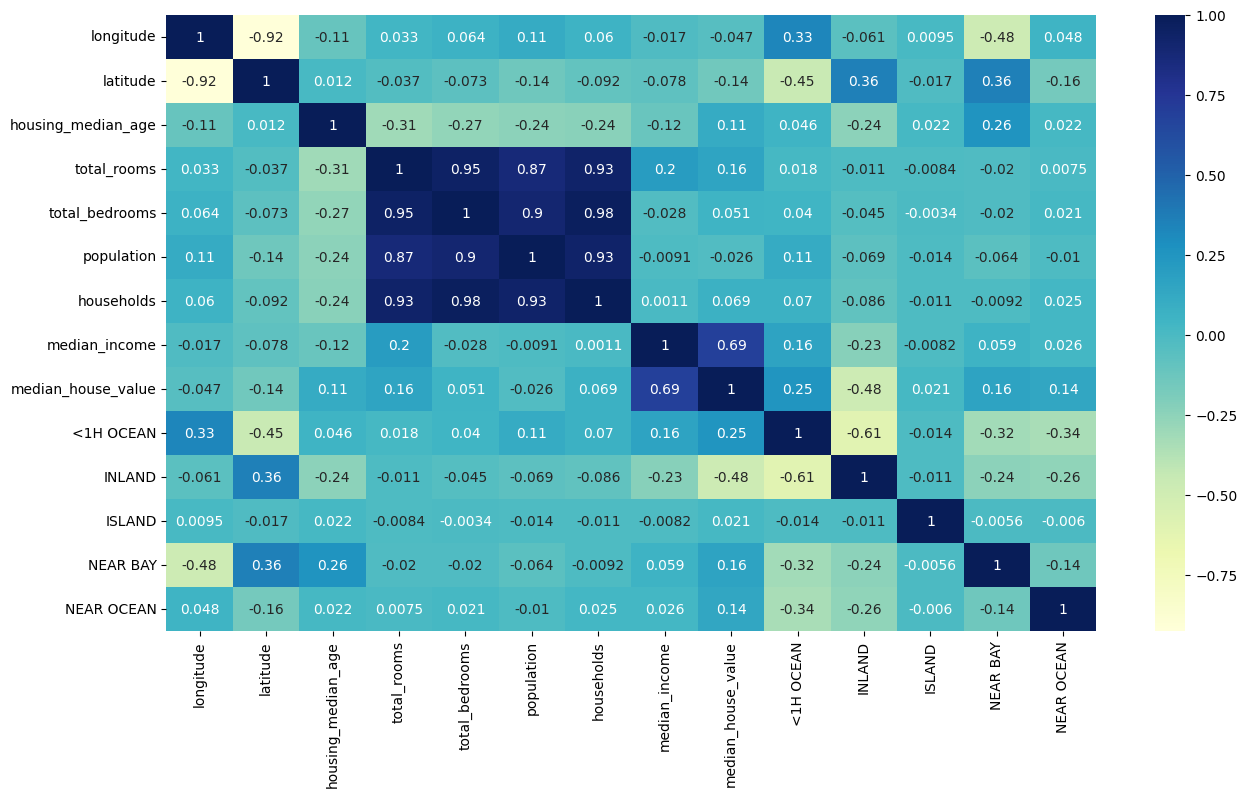

In [220]:
# Recreate Correlation Matrix

# Correlation for numeric columns only
correlation_matrix = train_data.select_dtypes(include=["number"]).corr()

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

# Display the plot
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

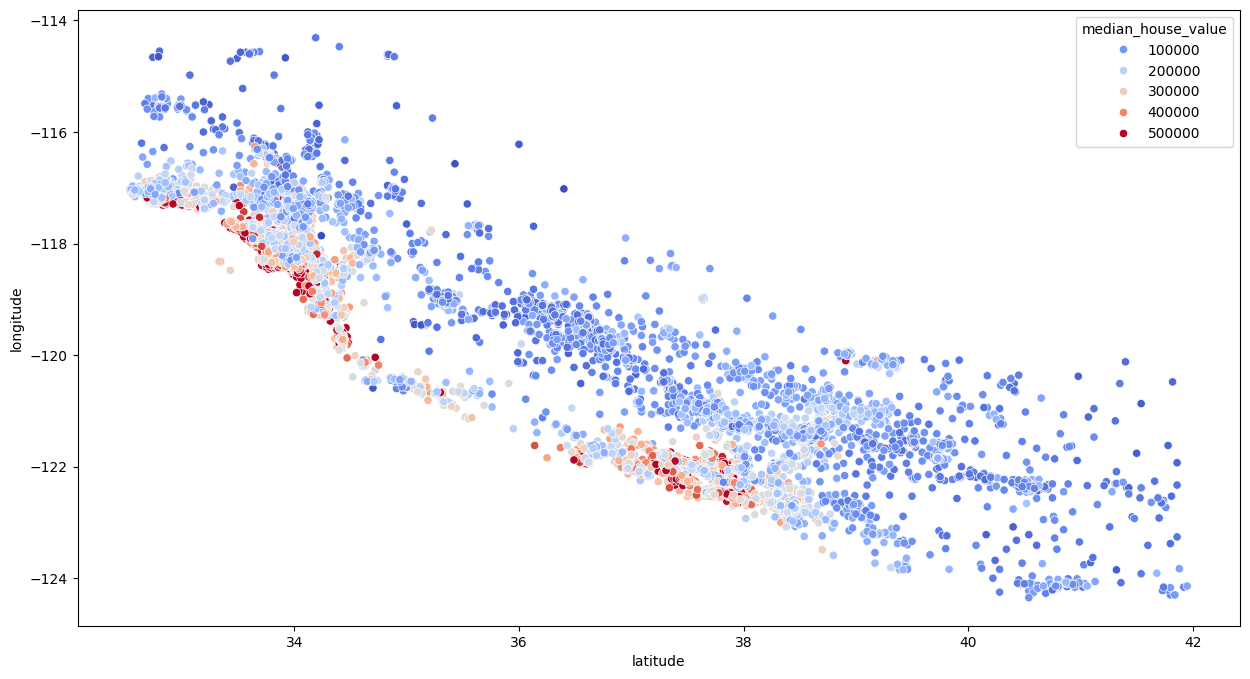

In [221]:
# Mapping longitude & latitude of housinng locations to median house value
plt.figure(figsize= (15,8))

sns.scatterplot(x="latitude", y= "longitude", data= train_data, hue = "median_house_value", palette="coolwarm")

In [222]:
# Feature Engineering
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

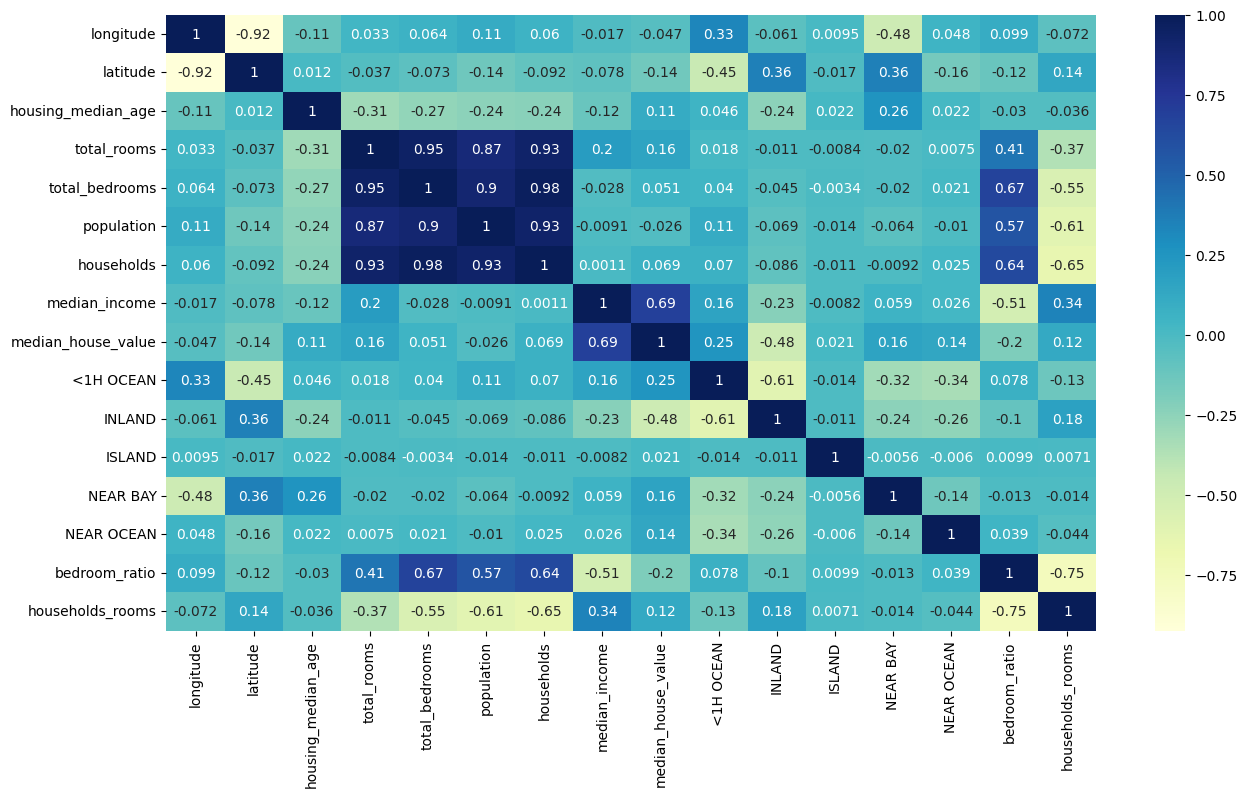

In [223]:
# Recreate Correlation Matrix w/ added features

# Correlation for numeric columns only
correlation_matrix = train_data.select_dtypes(include=["number"]).corr()

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

# Display the plot
plt.show()

In [224]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

x_train, y_train= train_data.drop(["median_house_value"], axis= 1), train_data['median_house_value']
# standardize x
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s,y_train)

LinearRegression()

In [225]:
# Create test data

test_data = x_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms']+1)
test_data['population']= np.log(test_data['population']+1)
test_data['households']= np.log(test_data['households']+1)

test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']


In [226]:
x_test, y_test= test_data.drop(["median_house_value"], axis= 1), test_data['median_house_value']

In [227]:
x_test_s = scaler.transform(x_test)

In [228]:
reg.score(x_test_s,y_test)

0.6764002997977931

In [231]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [232]:
forest.score(x_test, y_test)

0.8110501911170969

In [238]:
from sklearn.model_selection import GridSearchCV

forest= RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split":[2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring= 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [239]:
best_forest = grid_search.best_estimator_

In [240]:
best_forest.score(x_test_s,y_test)

0.8133275532620265